# <center><font color="red">PRCL-0019-Sales Effectiveness</center>

## PROBLEM STATEMENT
- FicZon Inc, a provider of on-premises and SaaS IT solutions, is experiencing a drop in sales due to rising competition and reliance on manual lead categorization. The current process is subjective and delays decision-making, as it depends heavily on sales staff experience. Although a quality check exists, it is only useful for post-sale analysis.
- To improve sales efficiency and conversion rates, FicZon plans to implement a Machine Learning model that can automatically classify leads as "High Potential" or "Low Potential" at the time they are created, enabling sales teams to focus on the most promising opportunities.

## Database details: 
- DB Name: project_sales
- Table Name: data
- Host: 18.136.157.135
- Port: 3306 
- Username: dm_team2
- Password: DM!$Team&27@9!20!

## DOMAIN ANALYSIS AND ATTRIBUTES
This project falls under the "Sales and Marketing" domain, focusing on predicting the lead category (High Potential or Low Potential) based on key attributes such as,
- **Created**: Date and time when the lead was created in the system.
- **Product_ID**: Identifier for the product the lead is interested in.
- **Source**: Channel through which the lead was acquired.
- **Mobile**: Mobile phone number of the lead contact.
- **EMAIL**: Email address of the lead contact.
- **Sales_Agent**: Name or ID of the sales representative assigned to the lead.
- **Location**: Geographic location of the lead.
- **Delivery_Mode**: Mode of product delivery preferred or applicable for the lead.
- **Status**: Target variable tells about the lead category(high potential, low potential).

### NOTE:
A lead is a potential customer who has shown interest in the product or service.

## 1. IMPORTING LIBRARIES

In [6]:
# Importing pandas library for working with data sets
import pandas as pd

# Importing numpy library for working with arrays
import numpy as np

# Importing matplotlib.pyplot for visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Importing seaborn library for advanced visualization
import seaborn as sns

# Importing warnings for disable warnings from the code
import warnings
# To ignore the warnings
warnings.filterwarnings('ignore')

# Importing OS module to interact with the operating system
import os

# Importing MySQL Connector module to connect and interact with a MySQL database using Python
import mysql.connector

# YData Profiling for generating an automatic exploratory data analysis (EDA) report
from ydata_profiling import ProfileReport

# Convert categorical data to numerical
from sklearn.preprocessing import LabelEncoder 

# MinMaxScaler for feature scaling to bring values within a specific range
from sklearn.preprocessing import MinMaxScaler

# Importing train_test_split for splitting data into training and testing sets for model evaluation
from sklearn.model_selection import train_test_split

# Importing LogisticRegression
from sklearn.linear_model import LogisticRegression

# Importing DecisionTreeClassifier 
from sklearn.tree import DecisionTreeClassifier

# Importing an ensemble model RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Importing an advanced boosting model GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Importing an efficient and optimized version of gradient- XGBoost (Classification)
from xgboost import XGBClassifier 

# Importing KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Importing GridSearchCV for Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Importing RandomizedSearchCV for hyperparameter tuning using randomized search
from sklearn.model_selection import RandomizedSearchCV

# Importing SVC model from sklearn
from sklearn.svm import SVC

# Importing Multi-layer Perceptron (MLP) Classifier
from sklearn.neural_network import MLPClassifier

# Importing performance metrics for model evaluation
# accuracy_score,confusion_matrix,classification_report,etc.
from sklearn.metrics import *

## 2. LOADING THE DATA

In [8]:
# MAKING CONNECTION TO DATA BASE SERVER
connection=mysql.connector.connect(host='18.136.157.135',
                                  user='dm_team2',
                                  password='DM!$Team&27@9!20!',
                                  database='project_sales')

In [9]:
# FETCHING DATA FROM DATA BASE
query = "SELECT * FROM data"
data = pd.read_sql(query,connection)
data

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
...,...,...,...,...,...,...,...,...,...
7417,28-04-2018 09:45,9,Call,,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15,Call,,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5,Live Chat-Direct,,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21,CRM form,,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


## 3. BASIC CHECKS

In [11]:
# Visualizing the first 10 rows of the data
data.head(10)

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
5,14-11-2018 07:33,,Website,XXXXXXX,rXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
6,14-11-2018 05:58,,Website,XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
7,14-11-2018 05:49,,Website,XXXXXXX,rXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
8,14-11-2018 05:40,,Website,078XXXXXXX,DXXXXXXXheblue.com,Sales-Agent-10,,Mode-5,Open
9,14-11-2018 05:06,,Website,XXXXXXX,jXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open


In [12]:
# Visualizing the last 10 rows of the data
data.tail(10)

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
7412,28-04-2018 11:25,18,Just Dial,,cXXXXXXX@gmail.com,Sales-Agent-3,Bangalore,Mode-1,Long Term
7413,28-04-2018 11:25,18,Live Chat-Direct,,kXXXXXXX@gmail.com,Sales-Agent-2,Delhi,Mode-1,LOST
7414,28-04-2018 11:16,19,Call,,rXXXXXXXotmail.com,Sales-Agent-9,Mumbai,Mode-1,In Progress Positive
7415,28-04-2018 10:50,21,Live Chat-Direct,,aXXXXXXX@gmail.com,Sales-Agent-4,Bangalore,Mode-1,In Progress Negative
7416,28-04-2018 10:00,19,Live Chat-Direct,,uXXXXXXX@gmail.com,Sales-Agent-9,Other Locations,Mode-3,Junk Lead
7417,28-04-2018 09:45,9,Call,,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15,Call,,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5,Live Chat-Direct,,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21,CRM form,,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry
7421,28-04-2018 07:54,25,Website,,cXXXXXXX@gmail.com,Sales-Agent-3,Chennai,Mode-1,CONVERTED


In [13]:
# Checking the column names of the data
data.columns

Index(['Created', 'Product_ID', 'Source', 'Mobile', 'EMAIL', 'Sales_Agent',
       'Location', 'Delivery_Mode', 'Status'],
      dtype='object')

In [14]:
# Checking the index of the data
data.index

RangeIndex(start=0, stop=7422, step=1)

In [15]:
# Checking the number of rows and columns of the data
data.shape

(7422, 9)

In [16]:
# Checking the basic information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Created        7422 non-null   object
 1   Product_ID     7422 non-null   object
 2   Source         7422 non-null   object
 3   Mobile         7422 non-null   object
 4   EMAIL          7422 non-null   object
 5   Sales_Agent    7422 non-null   object
 6   Location       7422 non-null   object
 7   Delivery_Mode  7422 non-null   object
 8   Status         7422 non-null   object
dtypes: object(9)
memory usage: 522.0+ KB


In [17]:
# Checking the statistical information of the categorical column in the data
data.describe(include="O")

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
count,7422,7422,7422,7422,7422,7422,7422,7422,7422
unique,6752,30,26,487,883,13,18,5,11
top,26-09-2018 11:30,18,Call,,#VALUE!,Sales-Agent-4,Other Locations,Mode-5,Junk Lead
freq,4,1711,2547,1810,1701,1500,2500,2975,1536


## 4. EXPLORATORY DATA ANALYSIS (EDA)

### 4.1. PROFILE REPORT

In [20]:
report = ProfileReport(data, title="EDA",explorative=False)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### 4.2. UNIVARIATE ANALYSIS 

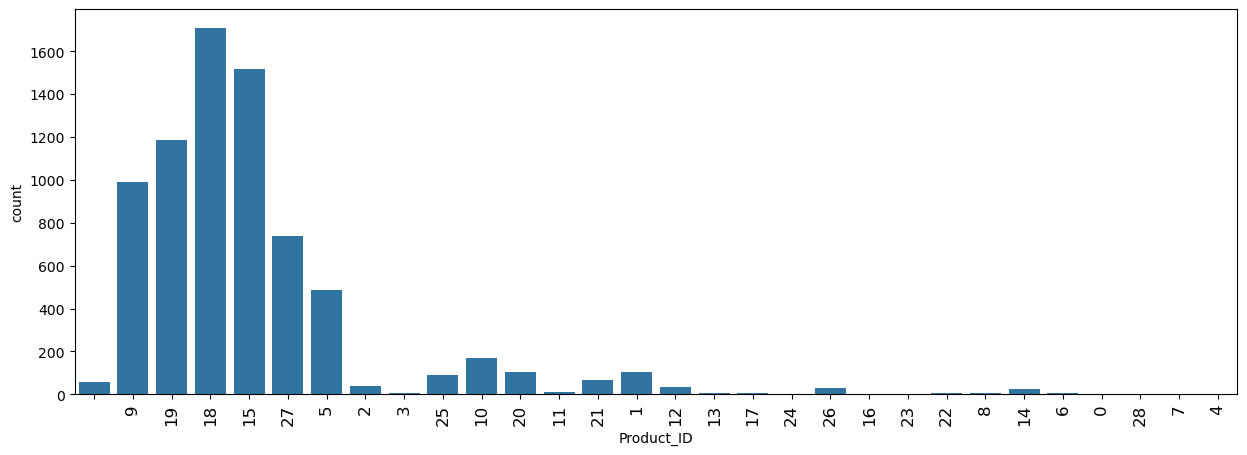

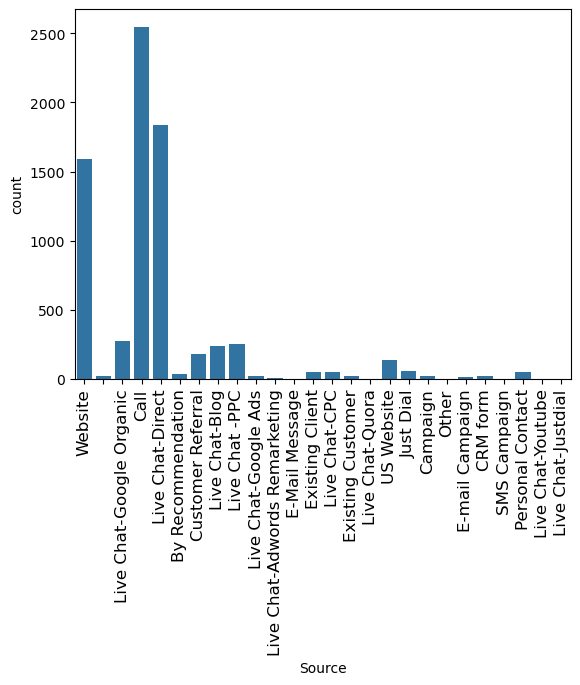

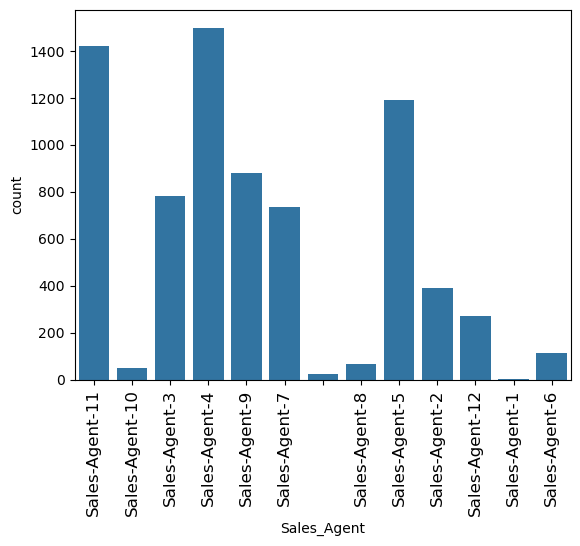

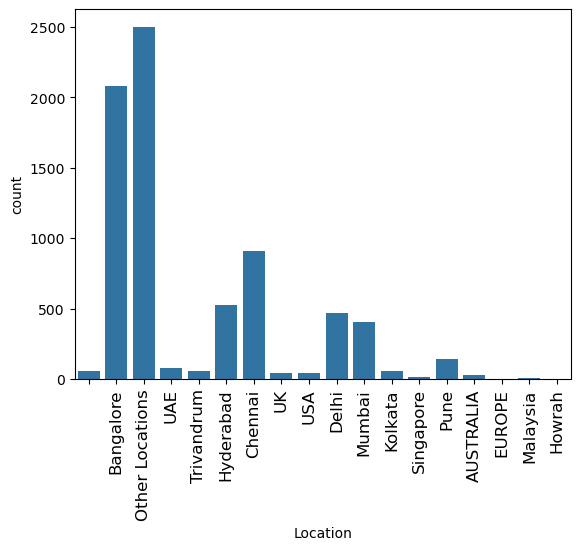

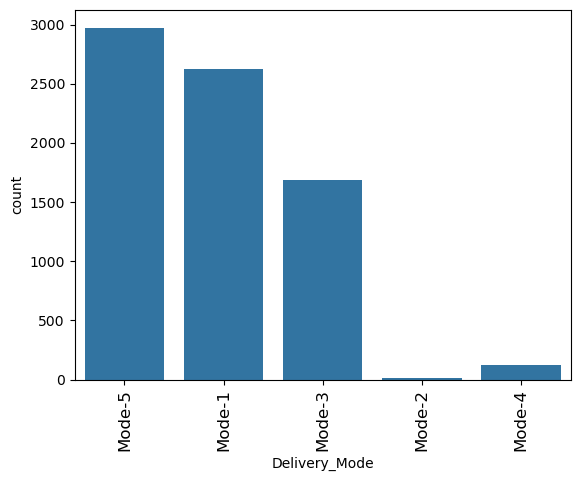

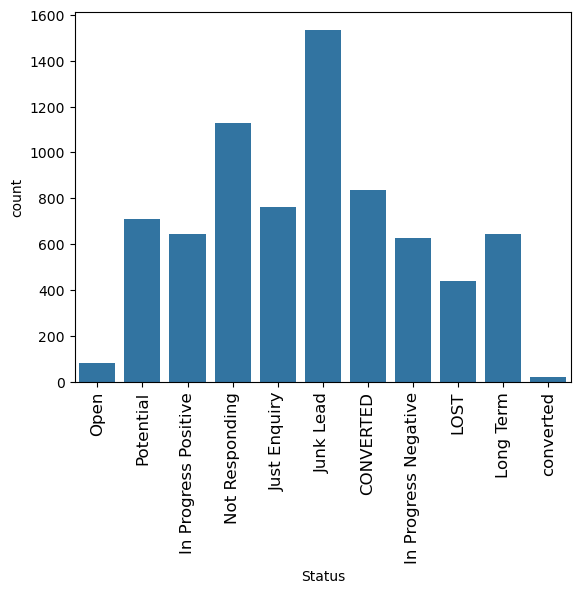

In [22]:
# FOR CATEGORICAL COLUMN
plt.figure(figsize=(15,5))
for i in data.select_dtypes(include='object').drop(['Created','Mobile','EMAIL'],axis=1):
    sns.countplot(x=data[i],data=data)
    plt.xticks(rotation = 90,fontsize=12)
    plt.show()

### 4.3. BIVARIATE ANALYSIS

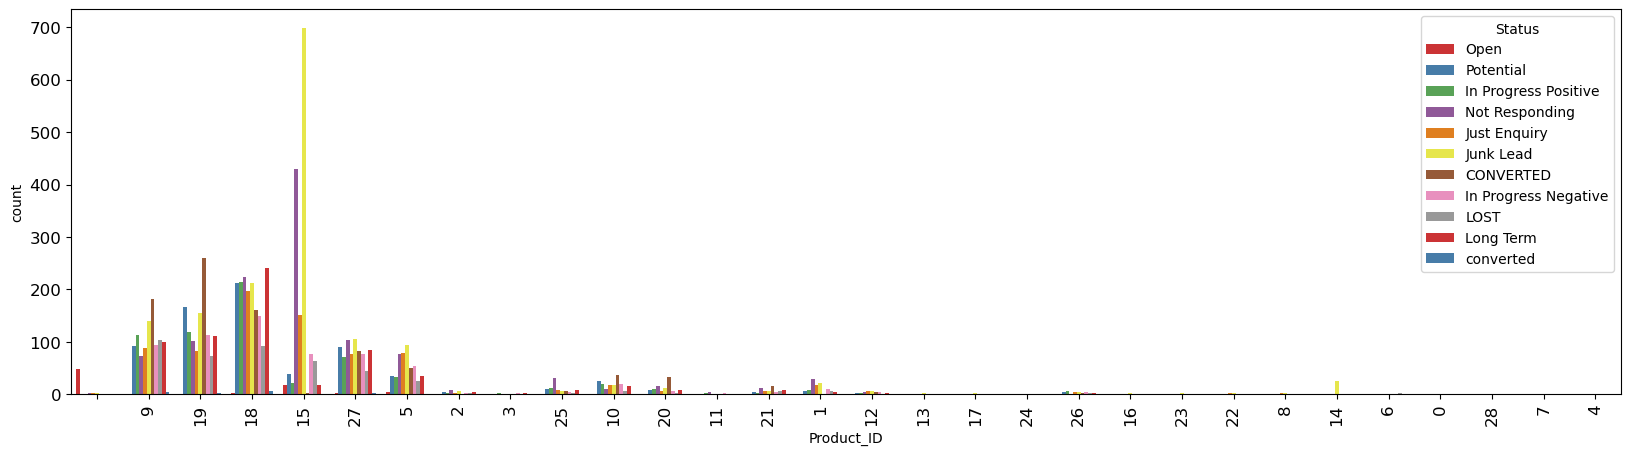

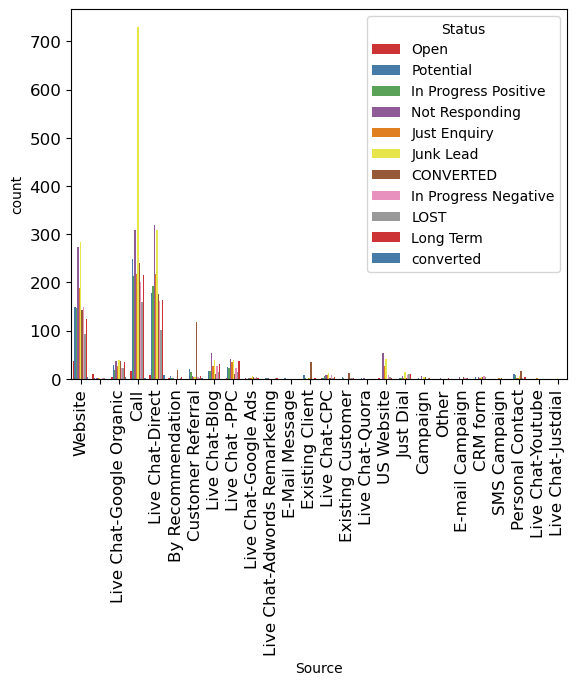

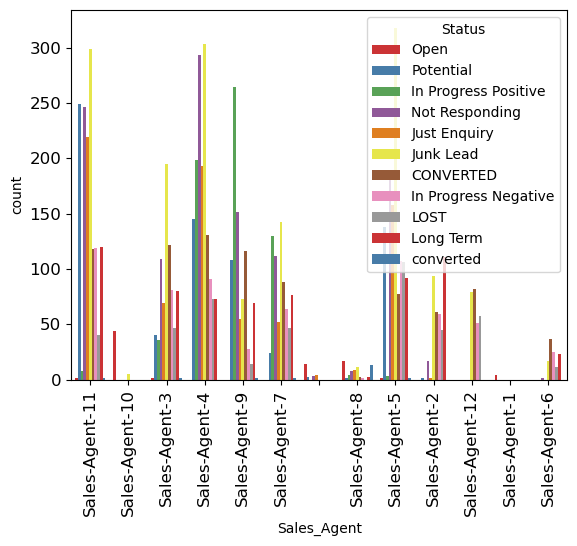

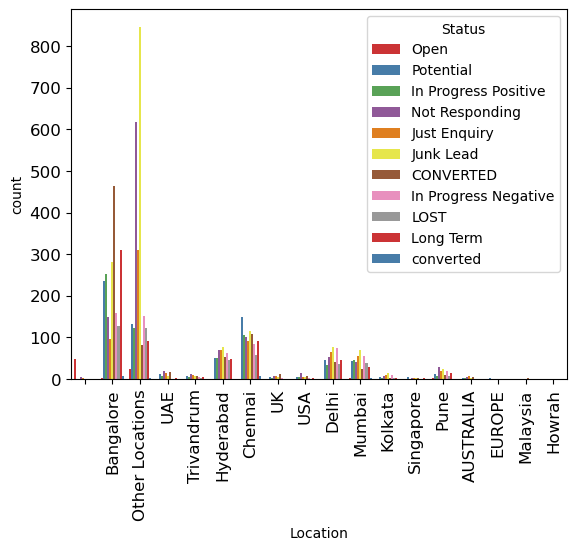

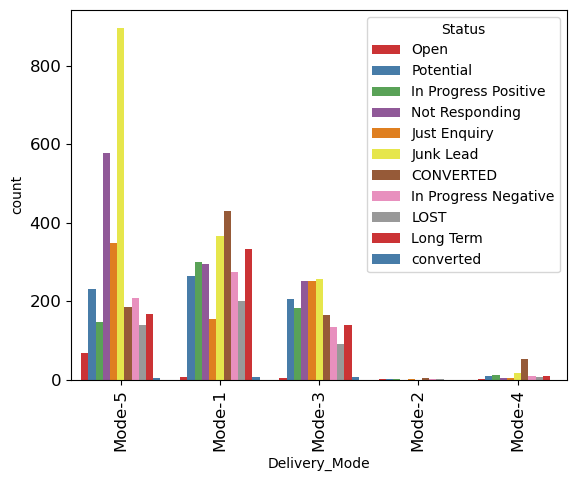

In [24]:
# FOR CATEGORICAL COLUMN
plt.figure(figsize=(20,5))
for i in data.select_dtypes(include='object').drop(['Created','Mobile','EMAIL','Status'],axis=1):
    sns.countplot(x=data[i],data=data,hue = data.Status,palette='Set1')
    plt.xticks(rotation = 90,fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

# high_potential = ['CONVERTED', 'converted', 'Potential', 'In Progress Positive', 'Open', 'Long Term']
# low_potential = ['Junk Lead', 'Not Responding', 'Just Enquiry', 'LOST', 'In Progress Negative']

## INSIGHTS FROM EDA
- Focus sales efforts on Product_IDs - **9**, **18**, **19** and **27** which show a higher share of high-potential leads.
- Source = **Website** shows a high number of high-potential leads especially for Open, In Progress Positive, Potential & CONVERTED; Whereas, Source = **Call** has a very high number of Junk Lead statuses(low-potential leads).
- **Sales_Agent-9** and **Sales_Agent-11** show strong high-potential performance; Whereas, **Sales_Agent-4** & **Sales_Agent-5** have large counts of Junk Lead and Not Responding statuses(low-potential leads).
- **Bangalore** has the highest number of high-potential leads; Whereas, **Other Locations** have the highest count of Junk Lead statuses(low-potential leads).
- **Mode-1** shows a high number of high-potential leads especially for CONVERTED, Long Term and In Progress Positive; Whereas, **Mode-5** has a very high number of Junk Lead statuses(low-potential leads).
- **Empty strings** are present in the "Product_ID", "Source", "Sales_Agent" and "Location" features.
- There are **316 duplicates** present.

## 5. DATA PREPROCESSING

### 5.1. Map 'Status' to High/Low potential

In [28]:
high_potential = ['CONVERTED', 'converted', 'Potential', 'In Progress Positive', 'Open', 'Long Term']
low_potential = ['Junk Lead', 'Not Responding', 'Just Enquiry', 'LOST', 'In Progress Negative']

In [29]:
data['Status'] = data['Status'].apply(lambda x: 'High' if x in high_potential else 'Low')
data['Status']

0       High
1       High
2       High
3       High
4       High
        ... 
7417     Low
7418     Low
7419     Low
7420     Low
7421    High
Name: Status, Length: 7422, dtype: object

### 5.2. Handle datetime (Created)

In [31]:
data['Created'] = pd.to_datetime(data['Created'], format='%d-%m-%Y %H:%M', errors='coerce')
data = data.dropna(subset=['Created'])
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,2018-11-14 10:05:00,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,High
1,2018-11-14 09:22:00,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,High
2,2018-11-14 09:21:00,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,High
3,2018-11-14 08:46:00,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,High
4,2018-11-14 07:34:00,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,High


### 5.3. Create New Features

In [33]:
data['Created_DayOfWeek'] = data['Created'].dt.dayofweek
data['Created_Hour'] = data['Created'].dt.hour
data['Created_Month'] = data['Created'].dt.month
data['Lead_Recency'] = (pd.to_datetime('today') - data['Created']).dt.days
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status,Created_DayOfWeek,Created_Hour,Created_Month,Lead_Recency
0,2018-11-14 10:05:00,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,High,2,10,11,2363
1,2018-11-14 09:22:00,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,High,2,9,11,2363
2,2018-11-14 09:21:00,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,High,2,9,11,2363
3,2018-11-14 08:46:00,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,High,2,8,11,2363
4,2018-11-14 07:34:00,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,High,2,7,11,2363


- **Created_DayOfWeek**: Represents the day of the week.
- **Created_Hour**: Extracts the hour from the Created timestamp.
- **Created_Month**: Extracts the month from the Created date.
- **Lead_Recency**: Calculates how many days ago the lead was created compared to today. Recent leads might have a higher chance of converting.

### 5.4. Drop unrequired columns 

In [36]:
data.drop(['Created', 'Mobile', 'EMAIL'], axis=1, inplace=True)
data.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Created_DayOfWeek,Created_Hour,Created_Month,Lead_Recency
0,,Website,Sales-Agent-11,,Mode-5,High,2,10,11,2363
1,,Website,Sales-Agent-10,,Mode-5,High,2,9,11,2363
2,,Website,Sales-Agent-10,,Mode-5,High,2,9,11,2363
3,,Website,Sales-Agent-10,,Mode-5,High,2,8,11,2363
4,,Website,Sales-Agent-10,,Mode-5,High,2,7,11,2363


### 5.5. Checking the unique values for all the columns in the data

In [38]:
for i in data.columns:
    print(f"                                {i.title()}                        ")
    print("\n")
    print(f"* The number of unique values in {i} column :",data[i].nunique())
    print(">>",data[i].unique())
    print('==============================================================================')
    print("\n")

                                Product_Id                        


* The number of unique values in Product_ID column : 30
>> ['' '9' '19' '18' '15' '27' '5' '2' '3' '25' '10' '20' '11' '21' '1' '12'
 '13' '17' '24' '26' '16' '23' '22' '8' '14' '6' '0' '28' '7' '4']


                                Source                        


* The number of unique values in Source column : 26
>> ['Website' '' 'Live Chat-Google Organic' 'Call' 'Live Chat-Direct'
 'By Recommendation' 'Customer Referral' 'Live Chat-Blog' 'Live Chat -PPC'
 'Live Chat-Google Ads' 'Live Chat-Adwords Remarketing' 'E-Mail Message'
 'Existing Client' 'Live Chat-CPC' 'Existing Customer' 'Live Chat-Quora'
 'US Website' 'Just Dial' 'Campaign' 'Other' 'E-mail Campaign' 'CRM form'
 'SMS Campaign' 'Personal Contact' 'Live Chat-Youtube'
 'Live Chat-Justdial']


                                Sales_Agent                        


* The number of unique values in Sales_Agent column : 13
>> ['Sales-Agent-11' 'Sales-Agent-10' 'S

### 5.6. Imputation for Empty Strings

In [40]:
for i in data.columns:
    if data[i].dtypes == 'object':
        data[i] = data[i].replace('', data[i].mode()[0])
    else:
        data[i] = data[i].replace('', data[i].median())

data.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Created_DayOfWeek,Created_Hour,Created_Month,Lead_Recency
0,18,Website,Sales-Agent-11,Other Locations,Mode-5,High,2,10,11,2363
1,18,Website,Sales-Agent-10,Other Locations,Mode-5,High,2,9,11,2363
2,18,Website,Sales-Agent-10,Other Locations,Mode-5,High,2,9,11,2363
3,18,Website,Sales-Agent-10,Other Locations,Mode-5,High,2,8,11,2363
4,18,Website,Sales-Agent-10,Other Locations,Mode-5,High,2,7,11,2363


### 5.7. Checking Null Values

In [42]:
data.isnull().sum()

Product_ID           0
Source               0
Sales_Agent          0
Location             0
Delivery_Mode        0
Status               0
Created_DayOfWeek    0
Created_Hour         0
Created_Month        0
Lead_Recency         0
dtype: int64

### 5.8. Dropping Duplicates

In [44]:
# Total duplicate count
data.duplicated().sum()

316

In [45]:
# Filtering duplicated rows
duplicate_rows = data[data.duplicated()]
duplicate_rows 

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Created_DayOfWeek,Created_Hour,Created_Month,Lead_Recency
2,18,Website,Sales-Agent-10,Other Locations,Mode-5,High,2,9,11,2363
5,18,Website,Sales-Agent-10,Other Locations,Mode-5,High,2,7,11,2363
7,18,Website,Sales-Agent-10,Other Locations,Mode-5,High,2,5,11,2364
8,18,Website,Sales-Agent-10,Other Locations,Mode-5,High,2,5,11,2364
9,18,Website,Sales-Agent-10,Other Locations,Mode-5,High,2,5,11,2364
...,...,...,...,...,...,...,...,...,...,...
7110,15,Call,Sales-Agent-12,Other Locations,Mode-5,Low,5,11,5,2556
7278,15,Call,Sales-Agent-3,Other Locations,Mode-5,Low,2,10,5,2559
7279,15,Call,Sales-Agent-7,Other Locations,Mode-5,Low,2,10,5,2559
7337,18,Just Dial,Sales-Agent-3,Bangalore,Mode-1,Low,0,15,4,2561


In [46]:
# Dropping Duplicate Rows
data.drop_duplicates(inplace=True)

In [47]:
# Verification
data.duplicated().sum()

0

### 5.9. Handling Outliers

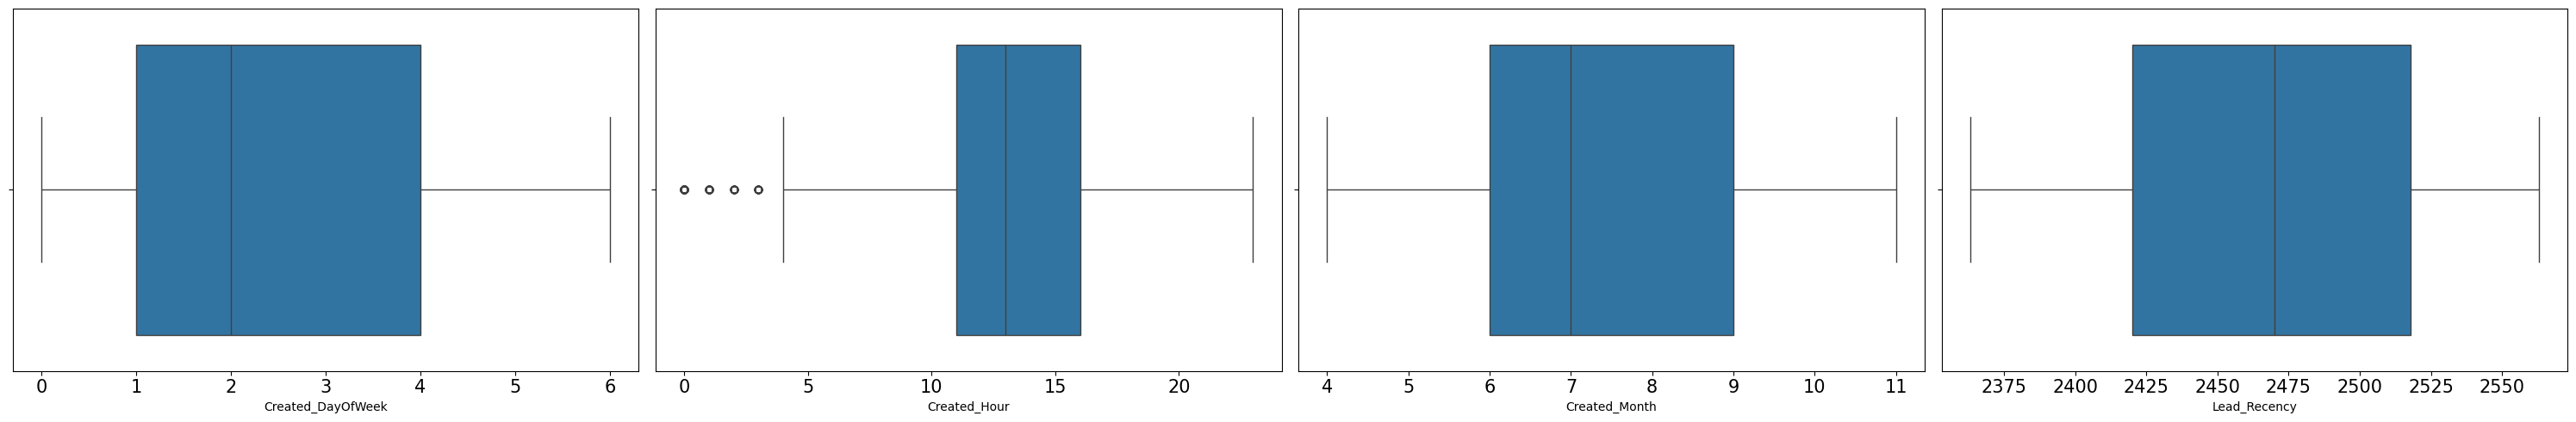

In [49]:
# boxplot to identify outliers
plt.figure(figsize=(30,5))                      
plotnumber = 1
for i in data.select_dtypes(exclude='object'):                       
    plt.subplot(1,4,plotnumber)                   
    sns.boxplot(x = data[i])                      
    plt.xticks(fontsize=15)                       
    plt.yticks(fontsize=15)                       
    plotnumber = plotnumber + 1
plt.tight_layout()             

In [50]:
# using Winsorize method
from scipy.stats.mstats import winsorize
data['Created_Hour'] = winsorize(data['Created_Hour'],limits=(0.03,0))

Winsorization is a statistical technique used to manage outliers by capping extreme values at specified percentiles, rather than removing them entirely. This approach modifies the most extreme data points to reduce their influence while preserving the dataset's overall structure.

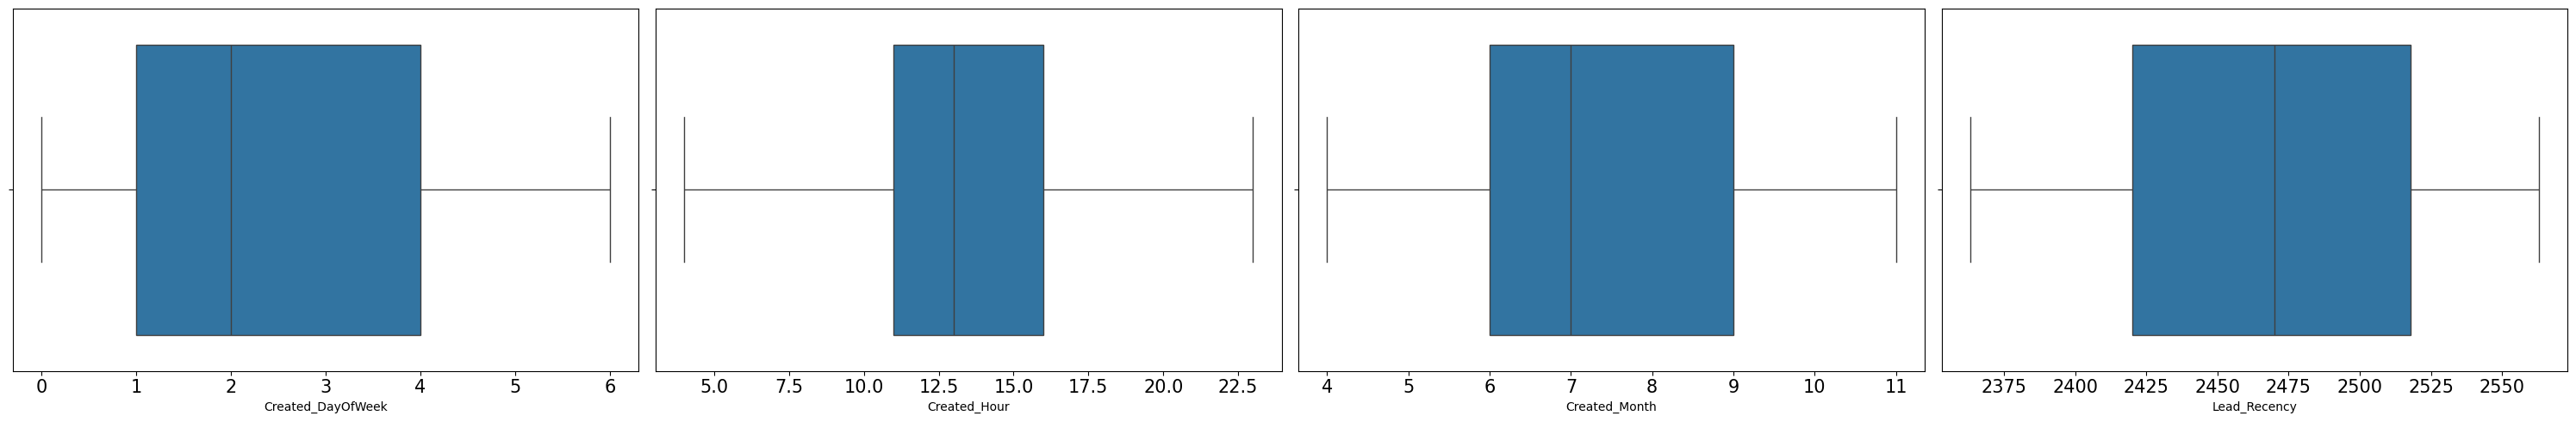

In [52]:
# Verification
plt.figure(figsize=(30,5))                      
plotnumber = 1
for i in data.select_dtypes(exclude='object'):                       
    plt.subplot(1,4,plotnumber)                   
    sns.boxplot(x = data[i])                      
    plt.xticks(fontsize=15)                       
    plt.yticks(fontsize=15)                       
    plotnumber = plotnumber + 1
plt.tight_layout()             

### 5.10. Checking Skewness
Skewness range:

- Between -0.5 and 0.5 : data is fairly symmetrical
- Between -1 and -0.5 or 0.5 and 1 : data is moderately skewed
- Greater than 1 or Less than -1 : data is highly skewed

In [54]:
# Calculating skewness
skew_threshold = 1  # Threshold to identify which columns have high skewness(>1)
skewness = data.select_dtypes(exclude='object').skew()
high_skew_cols = skewness[abs(skewness) > skew_threshold].index.tolist()
print(skewness,'\n')
print("Columns have high skewness:", high_skew_cols)

Created_DayOfWeek    0.300988
Created_Hour         0.078467
Created_Month        0.133946
Lead_Recency        -0.116684
dtype: float64 

Columns have high skewness: []


**No high skewness in the numerical columns**

### 5.11. Encoding Categorical Columns

In [57]:
# using LabelEncoder
for i in data.select_dtypes(include='object'):
    data[i]=LabelEncoder().fit_transform(data[i])
data

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Created_DayOfWeek,Created_Hour,Created_Month,Lead_Recency
0,10,24,2,10,4,0,2,10,11,2363
1,10,24,1,10,4,0,2,9,11,2363
3,10,24,1,10,4,0,2,8,11,2363
4,10,24,1,10,4,0,2,7,11,2363
6,10,24,1,10,4,0,2,5,11,2364
...,...,...,...,...,...,...,...,...,...,...
7417,28,2,8,9,3,1,5,9,4,2563
7418,7,2,3,10,4,1,5,9,4,2563
7419,24,14,2,1,0,1,5,9,4,2563
7420,14,1,6,10,0,1,5,8,4,2563


Label Encoding is used to convert categorical columns into numerical form by assigning each category a unique integer. This allows machine learning models that require numerical inputs to process categorical data effectively.



In [59]:
# Verification
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7106 entries, 0 to 7421
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Product_ID         7106 non-null   int32
 1   Source             7106 non-null   int32
 2   Sales_Agent        7106 non-null   int32
 3   Location           7106 non-null   int32
 4   Delivery_Mode      7106 non-null   int32
 5   Status             7106 non-null   int32
 6   Created_DayOfWeek  7106 non-null   int32
 7   Created_Hour       7106 non-null   int32
 8   Created_Month      7106 non-null   int32
 9   Lead_Recency       7106 non-null   int64
dtypes: int32(9), int64(1)
memory usage: 360.9 KB


### 5.12. Feature Selection

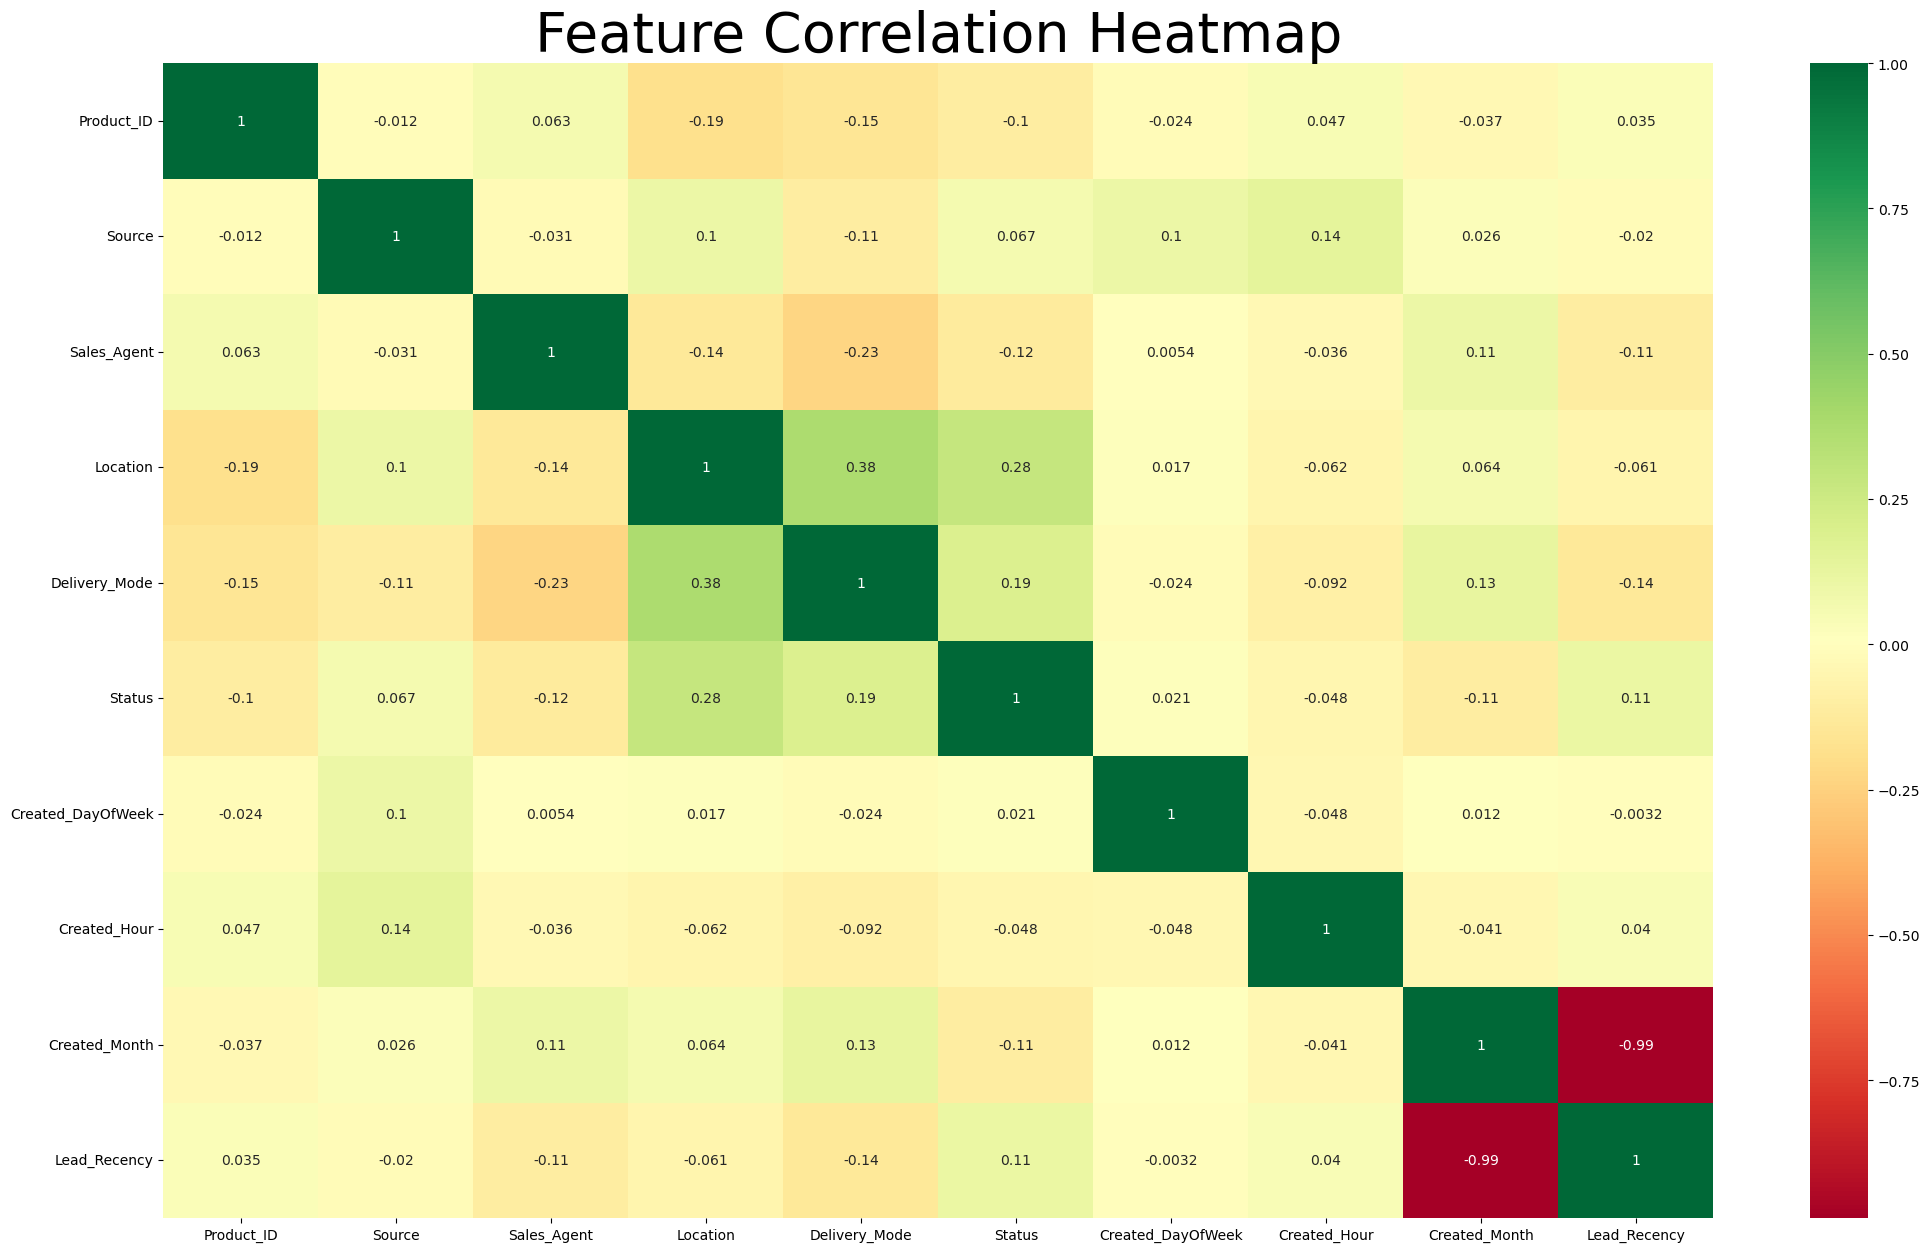

In [61]:
# Correlation Analysis
plt.figure(figsize=(25,15))
sns.heatmap(data = data.corr(),annot=True,cmap='RdYlGn')
plt.title('Feature Correlation Heatmap',fontsize=40)
plt.show()

Since we have only 10 columns. Feature like Created_DayOfWeek have no correlation or little correlation with target variable. This feature might still be useful (even if it's correlation appears low). So, we won't drop.

### 5.13. Feature Scaling

Using MinMaxScaler
- MinMaxScaler is a data preprocessing technique that scales features to a specified range, typically between 0 and 1.

In [65]:
df = MinMaxScaler().fit_transform(data.drop('Status',axis=1))
df

array([[0.35714286, 1.        , 0.18181818, ..., 0.31578947, 1.        ,
        0.        ],
       [0.35714286, 1.        , 0.09090909, ..., 0.26315789, 1.        ,
        0.        ],
       [0.35714286, 1.        , 0.09090909, ..., 0.21052632, 1.        ,
        0.        ],
       ...,
       [0.85714286, 0.58333333, 0.18181818, ..., 0.26315789, 0.        ,
        1.        ],
       [0.5       , 0.04166667, 0.54545455, ..., 0.21052632, 0.        ,
        1.        ],
       [0.64285714, 1.        , 0.45454545, ..., 0.15789474, 0.        ,
        1.        ]])

## 6. Data Splitting

In [67]:
# Independent variables
x = pd.DataFrame(df, columns=[i for i in data.columns if i != 'Status']) 
x

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Created_DayOfWeek,Created_Hour,Created_Month,Lead_Recency
0,0.357143,1.000000,0.181818,0.6250,1.00,0.333333,0.315789,1.0,0.000
1,0.357143,1.000000,0.090909,0.6250,1.00,0.333333,0.263158,1.0,0.000
2,0.357143,1.000000,0.090909,0.6250,1.00,0.333333,0.210526,1.0,0.000
3,0.357143,1.000000,0.090909,0.6250,1.00,0.333333,0.157895,1.0,0.000
4,0.357143,1.000000,0.090909,0.6250,1.00,0.333333,0.052632,1.0,0.005
...,...,...,...,...,...,...,...,...,...
7101,1.000000,0.083333,0.727273,0.5625,0.75,0.833333,0.263158,0.0,1.000
7102,0.250000,0.083333,0.272727,0.6250,1.00,0.833333,0.263158,0.0,1.000
7103,0.857143,0.583333,0.181818,0.0625,0.00,0.833333,0.263158,0.0,1.000
7104,0.500000,0.041667,0.545455,0.6250,0.00,0.833333,0.210526,0.0,1.000


In [68]:
y = data.Status   # Dependent variable
y

0       0
1       0
3       0
4       0
6       0
       ..
7417    1
7418    1
7419    1
7420    1
7421    0
Name: Status, Length: 7106, dtype: int32

### 6.1. train_test_split 

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5684, 9)
(1422, 9)
(5684,)
(1422,)


In [71]:
# Check for Bias
y_train.value_counts()

Status
1    3365
0    2319
Name: count, dtype: int64

### 6.2. Data Balancing 
- Data Balancing is the process of adjusting the class distribution in a dataset such that each class has a relatively equal number of Samples.
- when dealing with imbalanced datasets, where one class's rarity can lead to biased model predictions and it reduce the models overal performance for that we use SMOTE techinique.
- " SMOTE " Generating synthetic examples for the minority class based on the existing data.

In [73]:
# Initializing SMOTE
from imblearn.over_sampling import SMOTE
smote= SMOTE(random_state=42)

# fitting and resampling training data
x_train_smote,y_train_smote=smote.fit_resample(x_train,y_train)

In [74]:
# importing counter to check count of each label in target column
from collections import Counter 
print("Class Before SMOTE : ",Counter(y_train))                        
print("Class After SMOTE : ",Counter(y_train_smote))     

Class Before SMOTE :  Counter({1: 3365, 0: 2319})
Class After SMOTE :  Counter({0: 3365, 1: 3365})


## 7. Models Without Hyperparameter Tuning

In [76]:
models = {"LogisticRegression": LogisticRegression(random_state=42),
          "RandomForest": RandomForestClassifier(random_state=42),
          "GradientBoosting": GradientBoostingClassifier(random_state=42),
          "XGBoost": XGBClassifier(random_state=42),
          "SVM": SVC(random_state=42),
          "KNN": KNeighborsClassifier(),
          "DecisionTree": DecisionTreeClassifier(random_state=42),
          "MLP": MLPClassifier(random_state=42)}

In [77]:
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(x_train_smote,y_train_smote) # Train the model
    y_pred = model.predict(x_test)    # Make predictions
    # Model Evaluation
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    print(f"\n{name} Model Results:")
    print(f"Accuracy: {acc:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print("Classification Report:")
    print(cr)
    print("-"*50)

Training LogisticRegression...

LogisticRegression Model Results:
Accuracy: 0.6385
Confusion Matrix:
[[361 206]
 [308 547]]
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.64      0.58       567
           1       0.73      0.64      0.68       855

    accuracy                           0.64      1422
   macro avg       0.63      0.64      0.63      1422
weighted avg       0.65      0.64      0.64      1422

--------------------------------------------------
Training RandomForest...

RandomForest Model Results:
Accuracy: 0.6786
Confusion Matrix:
[[342 225]
 [232 623]]
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.60      0.60       567
           1       0.73      0.73      0.73       855

    accuracy                           0.68      1422
   macro avg       0.67      0.67      0.67      1422
weighted avg       0.68      0.68      0.68      1422

-------------

## 8. Models With Hyperparameter Tuning

In [79]:
models = {"LogisticRegression": {"model": LogisticRegression(random_state=42),"params": {"C": [0.01, 0.1, 1, 10], "max_iter": [100, 200]}},
          "RandomForest": {"model": RandomForestClassifier(random_state=42),"params": {"n_estimators": [100, 200,300,400,500], "max_depth": [5, 10, None]}},
          "GradientBoosting": {"model": GradientBoostingClassifier(random_state=42),"params": {"n_estimators": [50, 100, 200], "max_depth": [5, 10, None]}},
          "XGBoost": {"model": XGBClassifier(random_state=42),"params": {"n_estimators": [100, 200,300,400,500], "max_depth": [5, 10, None], "learning_rate":[0.001,0.01,0.03,0.1]}},
          "SVM": {"model": SVC(random_state=42),"params": {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]}},
          "KNN": {"model": KNeighborsClassifier(),"params": {"n_neighbors": [3, 5, 7], "weights": ["uniform", "distance"]}},
          "DecisionTree": {"model": DecisionTreeClassifier(random_state=42),"params": {"max_depth": [5, 10, None], "criterion": ["gini", "entropy"]}},
          "MLP": {"model": MLPClassifier(random_state=42), "params": {"hidden_layer_sizes": [100,200], "activation": ["relu", "tanh"], "solver": ["adam", "sgd"]}}}

In [80]:
for name, param in models.items():
    print(f"Training {name} with GridSearchCV...")
    # Perform hyperparameter tuning using GridSearchCV
    grid_search = GridSearchCV(param["model"], param["params"], cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
    grid_search.fit(x_train_smote,y_train_smote)
    # Best model after tuning
    best_model = grid_search.best_estimator_
    # Make predictions
    y_pred = best_model.predict(x_test)
    # Model Evaluation
    hyper_acc = accuracy_score(y_test, y_pred)
    hyper_cm = confusion_matrix(y_test, y_pred)
    hyper_cr = classification_report(y_test, y_pred)
    print(f"\n{name} Model Results:")
    print(f"Accuracy: {hyper_acc:.4f}")
    print("Confusion Matrix:")
    print(hyper_cm)
    print("Classification Report:")
    print(hyper_cr)
    print("-"*50)

Training LogisticRegression with GridSearchCV...
Fitting 5 folds for each of 8 candidates, totalling 40 fits

LogisticRegression Model Results:
Accuracy: 0.6385
Confusion Matrix:
[[361 206]
 [308 547]]
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.64      0.58       567
           1       0.73      0.64      0.68       855

    accuracy                           0.64      1422
   macro avg       0.63      0.64      0.63      1422
weighted avg       0.65      0.64      0.64      1422

--------------------------------------------------
Training RandomForest with GridSearchCV...
Fitting 5 folds for each of 15 candidates, totalling 75 fits

RandomForest Model Results:
Accuracy: 0.6821
Confusion Matrix:
[[350 217]
 [235 620]]
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.62      0.61       567
           1       0.74      0.73      0.73       855

    accuracy       

## 9. MODEL COMPARISON REPORT

In [128]:
# Creating a dictionary for models and their accuracy_score
comparison_dict = {'Model': ['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier', 'XGBClassifier', 'KNeighborsClassifier','MLPClassifier','SVC'],
                   'accuracy_score': [0.64, 0.67, 0.68, 0.71, 0.70, 0.60, 0.65, 0.64]}

# Creating DataFrame
comparison_df = pd.DataFrame(comparison_dict)
print(comparison_df.to_string(index=False))

                     Model  accuracy_score
        LogisticRegression            0.64
    DecisionTreeClassifier            0.67
    RandomForestClassifier            0.68
GradientBoostingClassifier            0.71
             XGBClassifier            0.70
      KNeighborsClassifier            0.60
             MLPClassifier            0.65
                       SVC            0.64


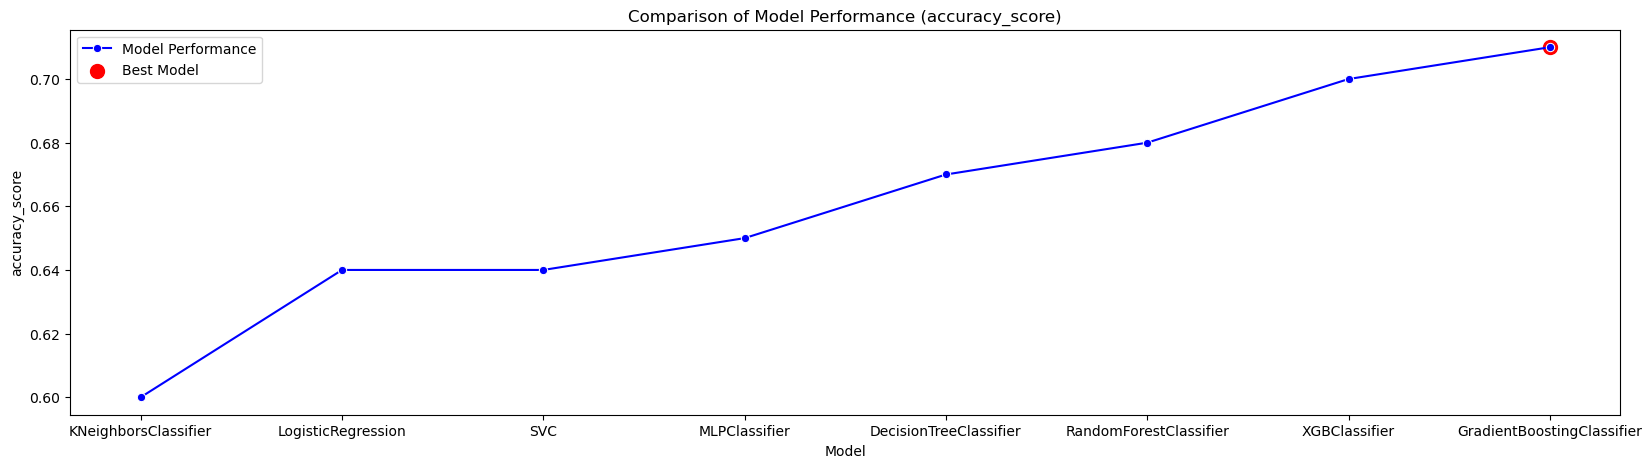

In [132]:
# Visualization
comparison_df = comparison_df.sort_values(by='accuracy_score', ascending=True)

max_index = comparison_df['accuracy_score'].idxmax()  # This returns the row index having highest accuracy_score

plt.figure(figsize=(20, 5))
sns.lineplot(data=comparison_df, x='Model', y='accuracy_score', marker='o', color='blue', label="Model Performance")

plt.scatter(comparison_df.loc[max_index, 'Model'], comparison_df.loc[max_index, 'accuracy_score'],color='red', s=100, label="Best Model")

plt.xlabel("Model")
plt.ylabel("accuracy_score")
plt.legend()
plt.title("Comparison of Model Performance (accuracy_score)")
plt.show()

## 10. CONCLUSION

- The **Gradient Boosting** achieved the highest accuracy score (0.71), making it the **most effective model** among those evaluated.
- Ensemble methods like **Random Forest**, **XGBoost** and **Gradient Boosting** consistently outperformed traditional models, showing their strength in handling complex patterns.
- By strategically focusing on the insights revealed through Data Exploration, result in a significant boost in sales effectiveness.

## 11. CHALLENGES FACED
1. Extracting insights from EDA.
2. Took more computational time for some models.
3. Improvising the model accuracy_score through hyperparameter tuning.

## PROJECT DETAILS:
Project Team ID : PTID-CDS-JAN-25-2368

Project ID : PRCL-0019-Sales Effectiveness (Client Project)

Team Members:

1. Peraisoodan Viswanath S - peraisoodanviswanath.s@gmail.com
2. Nirmal Newton M - nirmalnewton2003@gmail.com
3. Sivadhasan K - sivadhasansd@gmail.com